<a href="https://colab.research.google.com/github/LakshmanHA/Emoji-Generation/blob/main/Final_emoji_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step-2
#capturing image through webcam if flag value is true in step-1

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
from IPython.display import Image
def capture():
  try:
    if flag == True:
      filename = take_photo()
      print('Saved to {}'.format(filename))

      # Show the image which was just taken.
      display(Image(filename))
      return filename

    else:
      print("cotinue your chating")
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    return (str(err))
file = capture()

In [ ]:
#step-1

#reading input message and finding any needed key words are present

#downloading all packages in NLTK

import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
import re
import sys
#reading input message and pre-processing

input_msg = input('enter a msg : ')
input_msg = re.sub('[^a-zA-Z]',' ',input_msg)
input_msg = input_msg.lower()

#splitting message into separate words

split_msg = input_msg.split()
#print(split_msg)

#tagging parts-of-speech to each words

pos_tag_msg = pos_tag(split_msg)
pos_tag_msg = dict(pos_tag_msg)

#print(pos_tag_msg)

flag = False


#this is the list of our needed pos taggers
pos_list = ['JJ','JJR', 'JJS' , 'RB' , 'RBR' , 'RBS' , 'VB' , 'VBG'  , 'VBZ' , 'WDT' , 'WP' , 'WH' , 'VBP' , 'FW']

#turning flag value to True if message conatins our needed key words else turns key into false
for j in range(len(split_msg)):
  if pos_tag_msg[split_msg[j]] in pos_list:
        flag = True
        break
#step-2
#capturing image through webcam if flag value is true in step-1

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
from IPython.display import Image
def capture():
  try:
    if flag == True:
      filename = take_photo()
      #print('Saved to {}'.format(filename))

      # Show the image which was just taken.
      #display(Image(filename))
      return filename

    else:
      print("cotinue your chating")
      sys.exit()
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    return (str(err))
file = capture()
#step-3


#classifying the captured image facial expression


#importing modules


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

#loading model


model = load_model('drive/My Drive/Colab Notebooks/PKL files/model_filter1.h5')




#declaring emotion_anaysis function for predicting expression

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    bars=plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
    l = []
    for bar in bars:
      yval = bar.get_height()
      l.append(yval)
    max_value = max(l)

    orginal_index = list(emotions).index(max_value)
    emotion = objects[orginal_index]
    print('__________','Emotion:',emotion,'__________')
    return emotion


#ex_dim fuction for expand dimensions of input image according to traing dataset images size


def ex_dim(crop_image):


  file=crop_image
  true_image = image.load_img(file)
  img = image.load_img(file,color_mode = "grayscale", target_size=(48, 48))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  custom = model.predict(x)
  print(custom)
  org_emotion = emotion_analysis(custom[0])

  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);

  #plt.gray()
  #plt.imshow(true_image)
  #plt.xticks([]),plt.yticks([])
  #plt.imshow(img)
  #plt.show()
  return org_emotion

#facecrop function for face detection ,crop the face of image and finally store the cropped image

def facecrop(image_main):
    facedata = "drive/My Drive/Colab Notebooks/PKL files/haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image_main)

    try:

        minisize = (img.shape[1],img.shape[0])

        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]

            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('croped.jpg', sub_face)
            #print ("Writing: " + image)
            return str('croped.jpg')

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


crop_image = facecrop(file)
emotion = ex_dim(crop_image)

#generation of an emoji based on facial-expression


#detecting edge features of our input croped image

import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



def edge_feature(image):
     img = cv2.imread(image,0)
     img = cv2.resize(img,(28,28))
     img = cv2.bilateralFilter(img, 15, 10, 10)
     edges = cv2.Canny(img,100,200)
     edges = np.array(edges)
     norm_edges = edges/255.0
     norm_edges_sum = norm_edges.sum()
     return norm_edges_sum

img_edge_feature_sum = edge_feature(crop_image)
crop_image_read = cv2.imread(crop_image)
cv2_imshow(crop_image_read)


#genearating emojis based on expressions from already stored .PKL files
if emotion=='angry':
  emotion='fear'


emoji_file = pd.read_pickle('drive/My Drive/FITER pkl files/filter_'+str(emotion)+'.pkl')
org_emoji = emoji_file.iloc[:,0]
features_sum = emoji_file.iloc[:,-1]
features_sum = list(features_sum)
a = []
for i in features_sum:
    a.append(abs(i-img_edge_feature_sum))
low = min(a)
index = a.index(low)
index_value = features_sum[index]
org_index = features_sum.index(index_value)

cv2_imshow(org_emoji[org_index])



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
enter a msg : beautiful
cotinue your chating


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:


# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#step-3


#classifying the captured image facial expression


#importing modules


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

#loading model


model = load_model('drive/My Drive/Colab Notebooks/PKL files/model_filter_file.h5')




#declaring emotion_anaysis function for predicting expression

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    bars=plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
    l = []
    for bar in bars:
      yval = bar.get_height()
      l.append(yval)
    max_value = max(l)

    orginal_index = list(emotions).index(max_value)
    emotion = objects[orginal_index]
    print('__________','Emotion:',emotion,'__________')
    return emotion


#ex_dim fuction for expand dimensions of input image according to traing dataset images size


def ex_dim(crop_image):


  file=crop_image
  true_image = image.load_img(file)
  img = image.load_img(file,color_mode = "grayscale", target_size=(48, 48))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  custom = model.predict(x)
  print(custom)
  org_emotion = emotion_analysis(custom[0])

  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);

  plt.gray()
  plt.imshow(true_image)
  plt.xticks([]),plt.yticks([])
  #plt.imshow(img)
  plt.show()
  return org_emotion

#facecrop function for face detection ,crop the face of image and finally store the cropped image

def facecrop(image_main):
    facedata = "drive/My Drive/Colab Notebooks/PKL files/haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image_main)

    try:

        minisize = (img.shape[1],img.shape[0])

        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]

            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('croped.jpg', sub_face)
            #print ("Writing: " + image)
            return str('croped.jpg')

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


crop_image = facecrop(file)
emotion = ex_dim(crop_image)

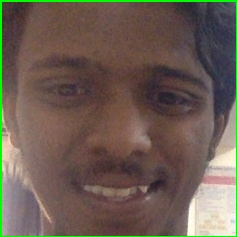

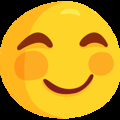

In [ ]:

#step-4

#generation of an emoji based on facial-expression


#detecting edge features of our input croped image

import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



def edge_feature(image):
     img = cv2.imread(image,0)
     img = cv2.resize(img,(28,28))
     edges = cv2.Canny(img,100,200)
     edges = np.array(edges)
     norm_edges = edges/255.0
     norm_edges_sum = norm_edges.sum()
     return norm_edges_sum

img_edge_feature_sum = edge_feature(crop_image)
crop_image_read = cv2.imread(crop_image)
cv2_imshow(crop_image_read)



#genearating emojis based on expressions from already stored .PKL filea


emoji_file = pd.read_pickle('drive/My Drive/Colab Notebooks/PKL files/'+str(emotion)+'.pkl')
org_emoji = emoji_file.iloc[:,0]
features_sum = emoji_file.iloc[:,-1]
features_sum = list(features_sum)
a = []
for i in features_sum:
    a.append(abs(i-img_edge_feature_sum))
low = min(a)
index = a.index(low)
index_value = features_sum[index]
org_index = features_sum.index(index_value)
cv2_imshow(org_emoji[org_index])



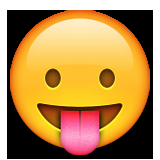

In [ ]:

#detecting edge features of our input croped image

import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



def edge_feature(image):
     img = cv2.imread(image,0)
     img = cv2.resize(img,(28,28))
     edges = cv2.Canny(img,100,200)
     edges = np.array(edges)
     norm_edges = edges/255.0
     #norm_edges_sum = norm_edges.sum()
     return norm_edges

img_edge_feature=edge_feature(crop_image)




#genearating emojis based on expressions from already stored .PKL filea


emoji_file = pd.read_pickle('drive/My Drive/Colab Notebooks/PKL files/'+str(emotion)+'.pkl')
org_emoji = emoji_file.iloc[:,0]
features = emoji_file.iloc[:,2]
features = list(features)
a = []
b = []
for i in features_sum:
    a.append(np.mean(np.not_equal(i , img_edge_feature), axis=1))

for j in a:
  b.append(np.mean(a))
low = min(b)

index = b.index(low)
index_value = features[index]
org_index = features.index(index_value)
cv2_imshow(org_emoji[org_index])
#plt.imshow(org_emoji[org_index])



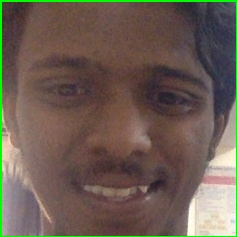

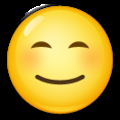

In [ ]:
#generation of an emoji based on facial-expression


#detecting edge features of our input croped image

import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



def edge_feature(image):
     img = cv2.imread(image,0)
     img = cv2.resize(img,(28,28))
     img = cv2.bilateralFilter(img, 15, 10, 10)
     edges = cv2.Canny(img,100,200)
     edges = np.array(edges)
     norm_edges = edges/255.0
     norm_edges_sum = norm_edges.sum()
     return norm_edges_sum

img_edge_feature_sum = edge_feature(crop_image)
crop_image_read = cv2.imread(crop_image)
cv2_imshow(crop_image_read)


#genearating emojis based on expressions from already stored .PKL files
if emotion=='fear':
  emotion='angry'


emoji_file = pd.read_pickle('drive/My Drive/FITER pkl files/filter_'+str(emotion)+'.pkl')
org_emoji = emoji_file.iloc[:,0]
features_sum = emoji_file.iloc[:,-1]
features_sum = list(features_sum)
a = []
for i in features_sum:
    a.append(abs(i-img_edge_feature_sum))
low = min(a)
index = a.index(low)
index_value = features_sum[index]
org_index = features_sum.index(index_value)
cv2_imshow(org_emoji[org_index])
